<h1>Multi-Layer Perceptron (MLP)</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
d=pd.read_csv("Cleandata.csv")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
x = d.drop(columns=['City','Street','County','Airport_Code','Severity'])
y=d['Severity']

# Create a label encoder object
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in x.columns:
    # Compare if the dtype is object
    if x[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        x[col]=le.fit_transform(x[col] )
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler to the data and transform it
x = scaler.fit_transform(x)

In [4]:

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the model
mlp = MLPClassifier(max_iter=20)

# Define the grid search parameters
parameter_space = {
    'hidden_layer_sizes': [(16,), (32,)],
    'activation': ['tanh', 'relu', 'logistic', 'identity'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['adaptive'],
    'batch_size':[50,100,150]
}

# Conduct Grid Search
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3,verbose=False)
X_train_small = X_train[:5000]
y_train_small = y_train[:5000]
# clf.fit(X_train, y_train)
clf.fit(X_train_small, y_train_small)
print('Best parameters found:\n', clf.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 150, 'hidden_layer_sizes': (32,), 'learning_rate': 'adaptive', 'solver': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


* <b>Accuracy Score Of Grid Search Along with Best Parameters </b>

In [6]:
# Predict on the test set
y_test_pred = clf.predict(X_test)
print('Accuracy: ', clf.best_score_)
print('Accuracy on the test set: ', accuracy_score(y_test, y_test_pred))
print('Best parameters found:\n', clf.best_params_)

Accuracy:  0.6444008917304175
Accuracy on the test set:  0.6376026133254141
Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 150, 'hidden_layer_sizes': (32,), 'learning_rate': 'adaptive', 'solver': 'adam'}


* <b>Save Model Into File To Later Use Directly </b>

In [7]:
from joblib import dump, load
dump(clf, 'grid.joblib')

['grid.joblib']

In [8]:
clf=load('grid.joblib')

In [9]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define the activation functions
activation_functions = ['tanh', 'relu', 'logistic', 'identity']

# Get the best parameters from the grid search
best_parameters = dict(clf.best_params_)

# Remove the 'activation' key from the dictionary as we'll be testing different activation functions
best_parameters.pop('activation')

# Define the lists to store the training ,validation and testing losses
train_losses = []


# Initialize variables to store the best activation function and its corresponding score
best_func = 'tanh'
best_score = 0

# Loop over the activation functions
for activation in activation_functions:
    # Create an MLPClassifier with the optimal hyperparameters from grid search
    _model = MLPClassifier(**best_parameters, activation=activation, max_iter=1, warm_start=True, random_state=42,verbose=False)

    epoch_train_losses = []


    for epoch in range(20):  # number of epochs
        # Fit the model on the training data
        _model.fit(X_train, y_train)
        # Append the training loss to the epoch_train_losses list
        epoch_train_losses.append(_model.loss_)

    train_losses.append(epoch_train_losses)




    # Print the activation function and the accuracies on the training and validation sets
    print(f'Activation Function = {activation}')
    print('Accuracy on training set: ', _model.score(X_train, y_train))

    # If the accuracy on the training set is higher than the current best score, update the best score and the best activation function
    if _model.score(X_train, y_train) > best_score:
        best_func = activation
        best_score = _model.score(X_train, y_train)

# Print the best activation function and its corresponding score
print(f'Best Activation Function = {best_func} with a score of {best_score}')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function = tanh
Accuracy on training set:  0.6789076313983246


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function = relu
Accuracy on training set:  0.6796621802826377


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function = logistic
Accuracy on training set:  0.6708212310055954


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function = identity
Accuracy on training set:  0.6320119636907441
Best Activation Function = relu with a score of 0.6796621802826377


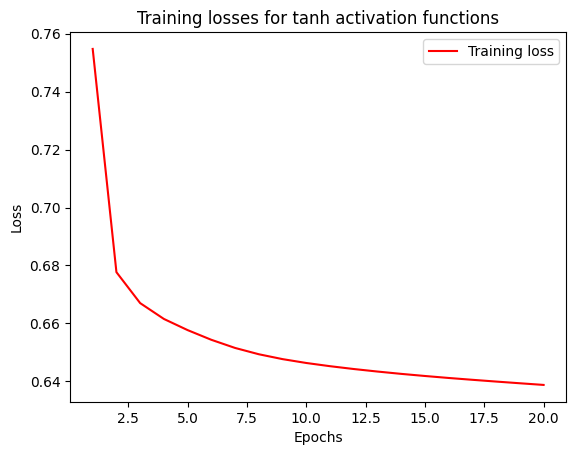

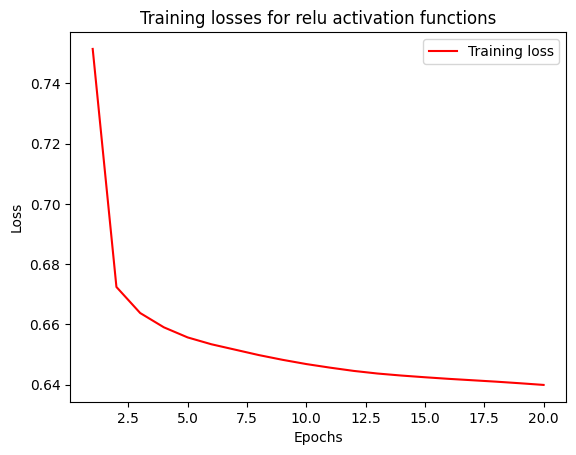

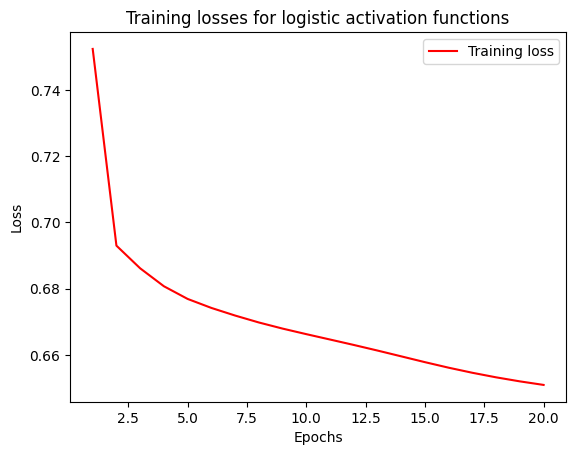

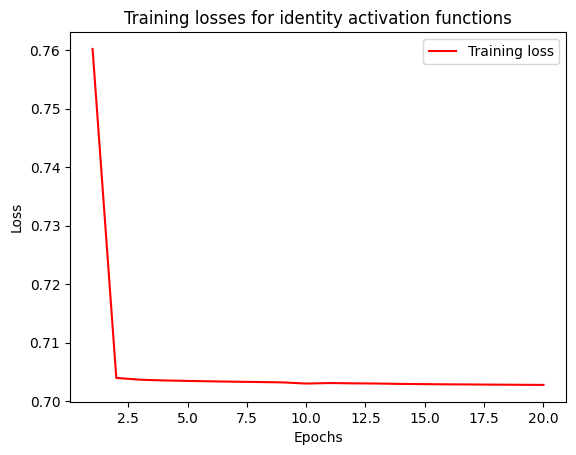

In [10]:
# Import matplotlib.pyplot for plotting
import matplotlib.pyplot as plt

# Define the number of epochs
epochs = range(1, 21)

# Loop over the activation functions
for i, activation in enumerate(activation_functions):
  # Plot the training loss vs. epochs
    plt.plot(epochs, train_losses[i],color='r', label='Training loss')
    plt.title(f'Training losses for {activation} activation functions')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


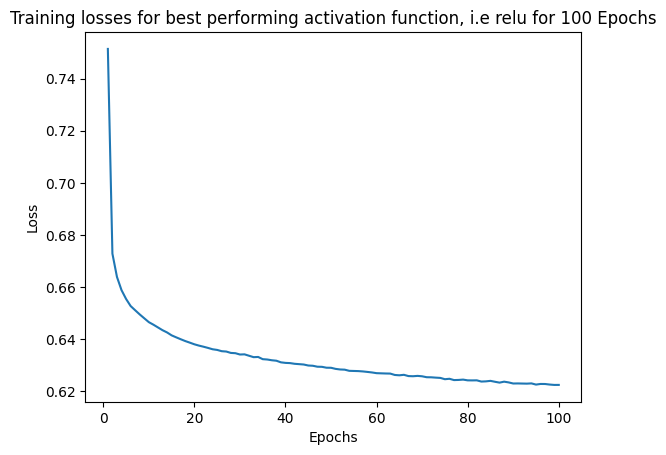

In [11]:
_model = MLPClassifier(**best_parameters, activation=best_func, max_iter=100, random_state=42,verbose=False)
  # Fit the model on the training data
_model.fit(X_train, y_train)
plt.plot(np.arange(1,101), _model.loss_curve_)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Training losses for best performing activation function, i.e {best_func} for 100 Epochs')
plt.show()


<h4>Save Model </h4>

In [12]:
from joblib import dump, load
dump(_model, 'mlp_model.joblib')

['mlp_model.joblib']

In [13]:
_model=load('mlp_model.joblib')

Accuracy on training set:  0.7001577279896727
Accuracy on the test set:  0.6998175763103748


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        35
           2       0.73      0.84      0.78     59003
           3       0.63      0.49      0.55     30754
           4       0.57      0.26      0.36      4494

    accuracy                           0.70     94286
   macro avg       0.48      0.40      0.42     94286
weighted avg       0.69      0.70      0.69     94286



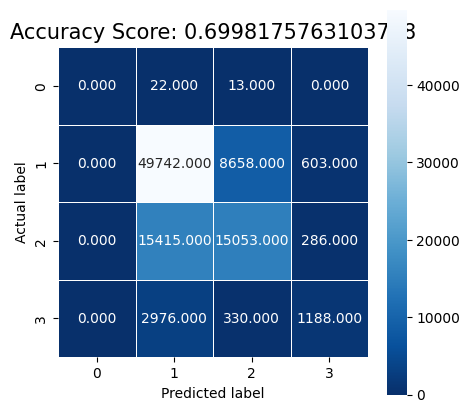

In [14]:

# Predict on the test set
best_test_pred = _model.predict(X_test)
print('Accuracy on training set: ',_model.score(X_train, y_train))
print('Accuracy on the test set: ', accuracy_score(y_test, best_test_pred))
print(classification_report(y_test, best_test_pred))
# Plot a confusion matrix
cm = confusion_matrix(y_test, best_test_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, best_test_pred))
plt.title(all_sample_title, size = 15);
plt.savefig('MLP.png')
plt.show()